In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# print(os.listdir('../data/reference_predictions'))
question_data = {}
forecast_data = {}

root_dir = '../data/reference_predictions'
for p in os.listdir(f'{root_dir}'):
    if(os.path.isdir(f'{root_dir}/{p}')):
        forecast_data[p[:15]] = pd.read_csv(f'{root_dir}/{p}/forecast_data.csv')
        question_data[p[:15]] = pd.read_csv(f'{root_dir}/{p}/question_data.csv')
    

In [72]:
for qid in question_data:
    print(f"Question ID: {qid}")
    print(f"Question Type: {question_data[qid]['Question Type'].iloc[-1]}")
    print(question_data[qid].keys())
    print(f"Question Title: {question_data[qid]['Question Title'].iloc[-1]}")

Question ID: AfD_share_in_20
Question Type: numeric
Index(['Question ID', 'Question URL', 'Question Title', 'Post ID',
       'Post Curation Status', 'Post Published Time', 'Default Project',
       'Default Project ID', 'Categories', 'Leaderboard Tags', 'Label',
       'Question Type', 'MC Options (Current)', 'MC Options (All)',
       'MC Options History', 'Lower Bound', 'Open Lower Bound', 'Upper Bound',
       'Open Upper Bound', 'Continuous Range', 'Open Time', 'CP Reveal Time',
       'Scheduled Close Time', 'Actual Close Time', 'Resolution',
       'Resolution Known Time', 'Include Bots in Aggregates',
       'Question Weight'],
      dtype='object')
Question Title: What will AfD's vote share be in the 2026 Baden-Württemberg state election?
Question ID: AI_companies'_S
Question Type: numeric
Index(['Question ID', 'Question URL', 'Question Title', 'Post ID',
       'Post Curation Status', 'Post Published Time', 'Default Project',
       'Default Project ID', 'Categories', 'Leader

In [51]:
def cdf_to_pdf(cdf, x=None):
    """Convert a CDF to a PDF via finite differences.

    Parameters
    ----------
    cdf : array-like, shape (n,)
        CDF values at grid points.
    x : array-like, shape (n,), optional
        Grid point locations. When provided, divides differences by bin
        widths so the result is a proper probability density. When omitted,
        returns probability masses (assumes unit spacing).

    Returns
    -------
    pdf : ndarray, shape (n,)
        PDF (or probability-mass) values aligned with the input grid.
    """
    cdf = np.asarray(cdf, dtype=float)
    mass = np.empty_like(cdf)
    mass[0] = cdf[0]
    mass[1:] = np.diff(cdf)

    if x is None:
        return mass

    x = np.asarray(x, dtype=float)
    dx = np.empty_like(x)
    dx[0] = 100 # x[1] - x[0]   # forward difference for first bin
    dx[1:] = np.diff(x)
    return mass / dx

In [69]:

from collections import Counter
print(Counter([qdata['Question Type'].iloc[-1] for qid, qdata in question_data.items()]))

Counter({'binary': 8, 'numeric': 6})


AfD_share_in_20
AI_companies'_S
Average_Redbook
Shanghai-LA_vs_
What_will_be_th
What_will_the_U


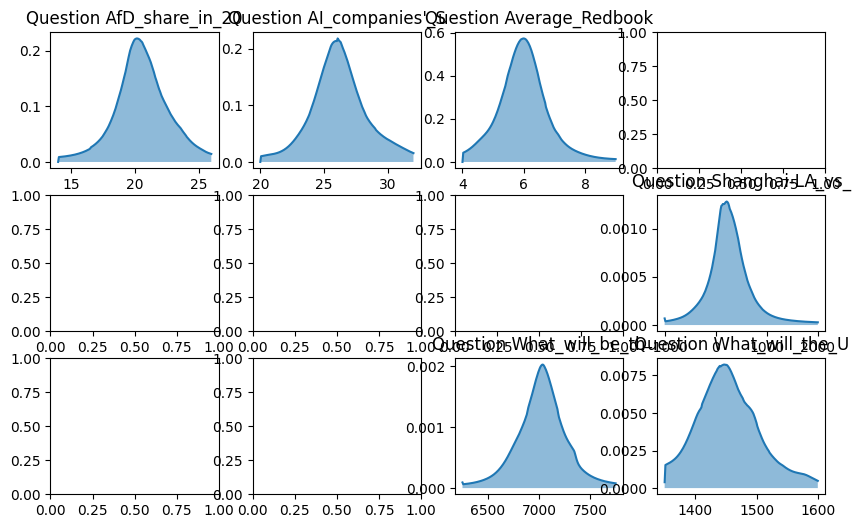

In [ ]:

fig, ax = plt.subplots(3, 4, figsize=(10, 6))

#plot pdf for all continuous questions
for i, qid in enumerate(question_data.keys()):
    qd = question_data[qid]
    if( not qd['Question Type'].iloc[0] == 'numeric'):
        continue

    row = i // 4
    col = i % 4

    cr = qd['Continuous Range'].iloc[0]
    cr = np.array([float(x) for x in cr[1:-1].split(', ')])

    print(qid)

    fd = forecast_data[qid]
    cdf_df = fd['Continuous CDF']
    cdf = np.array([float(x) for x in cdf_df.iloc[-1][1:-1].split(', ')])
    pdf = cdf_to_pdf(cdf, x=cr)
    ax[row, col].plot(cr, pdf, label='pdf')
    #fill under the curve
    ax[row, col].fill_between(cr, pdf, alpha=0.5)
    
    # sns.kdeplot(x=forecast_data[qid]['prediction'], fill=True, ax=ax[row, col])
    ax[row, col].set_title(f"Question {qid}")


In [21]:
qd = question_data['AfD_share_in_20']
cr = qd['Continuous Range'].iloc[0]
cr = np.array([float(x) for x in cr[1:-1].split(', ')])

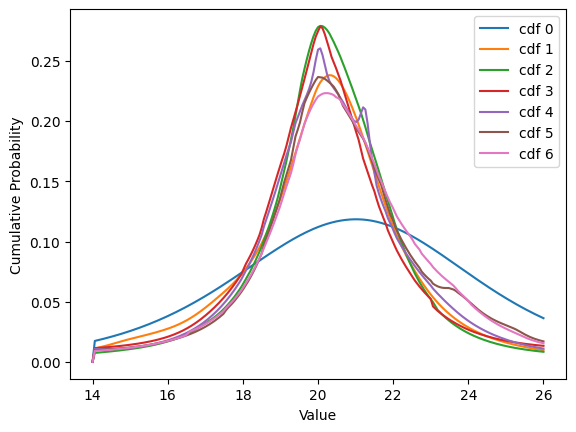

In [49]:
cdf_df = forecast_data['AfD_share_in_20']['Continuous CDF']

for i, cdf in enumerate(cdf_df.iloc[::50]):
    cdf = np.array([float(x) for x in cdf[1:-1].split(', ')])
    plt.plot(cr, cdf_to_pdf(cdf, x=cr), label=f'cdf {i}')

# print(cdf)
plt.xlabel('Value')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()